In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

### explorando os dados

In [2]:
# lendo o arquivo e visualizando as 5 primeiras linhas
data = pd.read_csv('datasets/wine_dataset.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
data.shape

(6497, 13)

In [4]:
# verificando as informações gerais do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# verificando a estatístisca geral do dataset
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


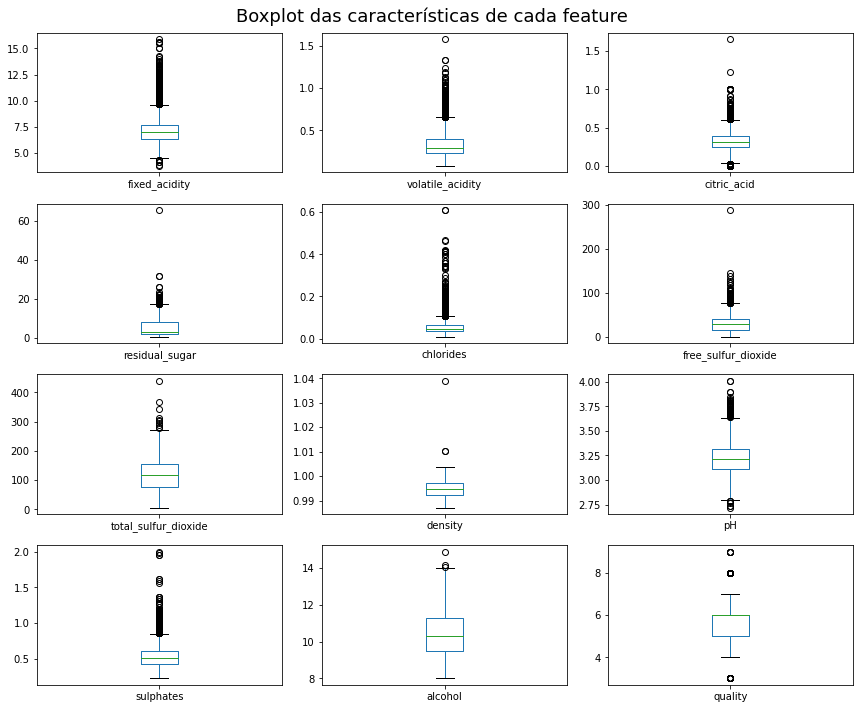

In [6]:
# plotando boxplots de cada feature
fig = data.plot(kind='box', subplots=True, layout=(4,3), figsize=(12, 10))
plt.suptitle('Boxplot das características de cada feature', fontsize=18)
plt.tight_layout()
plt.savefig('boxplot.png', format='png')
plt.show()

In [7]:
# verificando a quantidade de cada vinho
print(data['style'].value_counts())

print('-'*30)

# caso você queira ver a proporção entre cada tipo, é possível usar o parâmetro normalize=True (abaixo do pontilhado)
print(data['style'].value_counts(normalize=True))

white    4898
red      1599
Name: style, dtype: int64
------------------------------
white    0.753886
red      0.246114
Name: style, dtype: float64


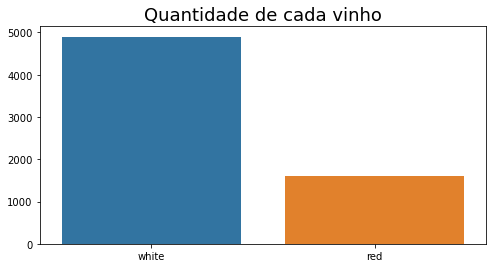

In [8]:
# verificando a quantidade de cada vinho no gráfico usando o seaborn
plt.figure(figsize=(8,4))
sns.barplot(x=data['style'].value_counts().index,
            y=data['style'].value_counts().values)
plt.title('Quantidade de cada vinho', fontsize=18)
plt.show()

obs: fiz um teste removendo os duplicados, entretanto o dataset continuou na proporção de 25-75, por isso resolvi não mudar a base original

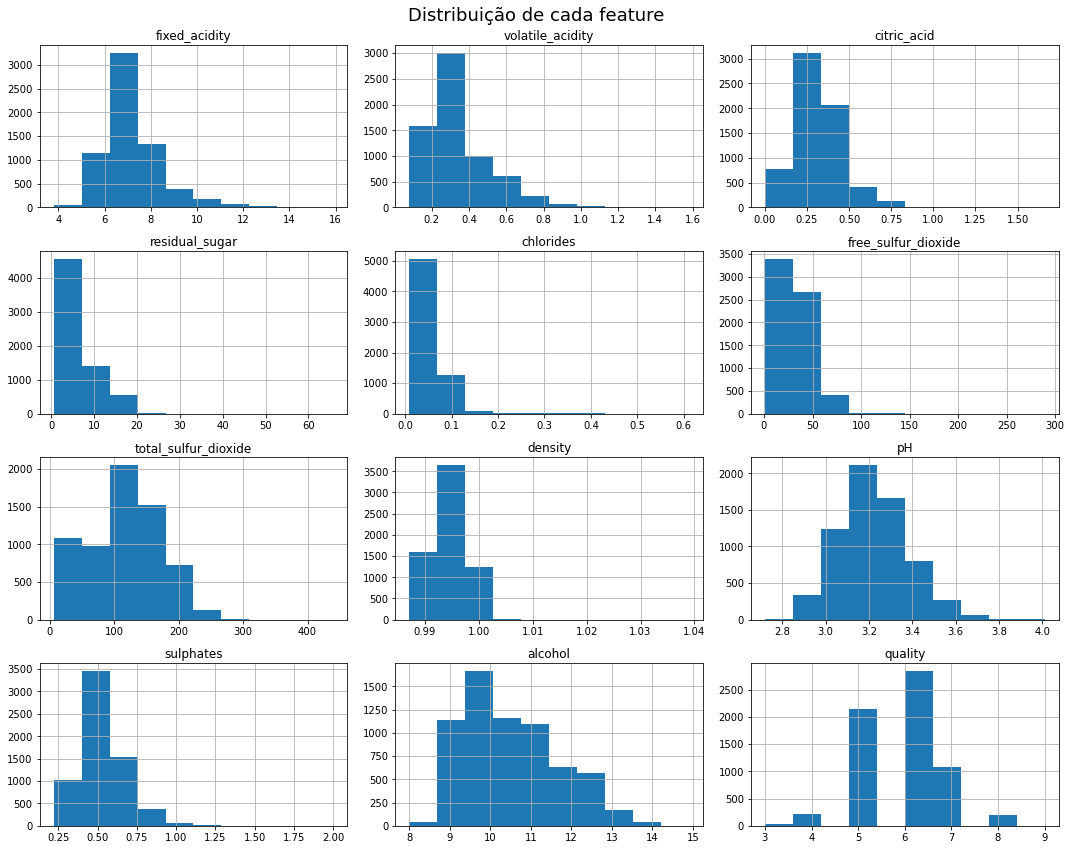

In [9]:
# histograma para ver a distribuição de cada valor
fig = data.hist(figsize=(15, 12))
plt.suptitle('Distribuição de cada feature', fontsize= 18)
plt.tight_layout()
plt.show()

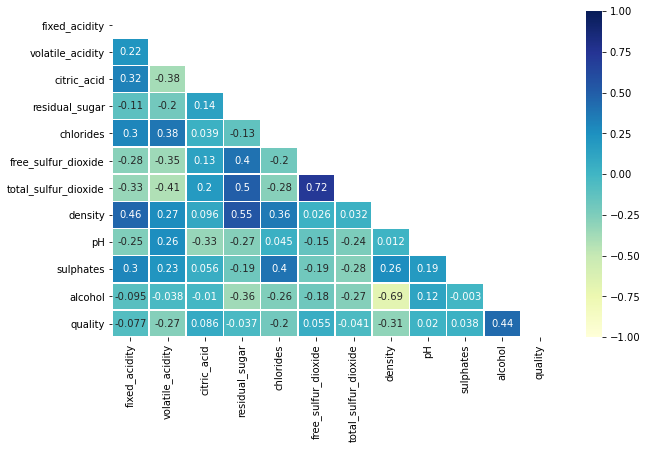

In [10]:
plt.figure(figsize=(10, 6))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            vmin=-1,
            vmax=1,
            center=0,
            annot=True,
            linewidths=.5,
            cmap='YlGnBu',
            mask=mask)

plt.show()

- o pairplot é bom para visão geral dos dados, mas pode ficar bem confuso cado o dataset possua varias colunas

sns.pairplot(data=data, hue='style', corner=True);

- o profiling também proporciona uma visão geral dos dados e nos entraga um relatório para melhor visualizá-lo

from pandas_profiling import ProfileReport

profile = ProfileReport(data, title='Relatório - Vinhos', html={'style': {'full_width':True}})

profile.to_file(output_file='relatorio_vinho.html')

### iniciando o modelo

In [11]:
# transformando str em int
data['style'] = data['style'].apply(lambda x: 0 if x == 'red' else 1)

In [12]:
# verificando as variáveis x e y
x = data.drop('style', axis=1)
y = data['style']
display(x, y)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: style, Length: 6497, dtype: int64

In [13]:
x.shape, y.shape

((6497, 12), (6497,))

In [14]:
# separando em dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [15]:
x_train.shape, x_test.shape

((4547, 12), (1950, 12))

#### Comparando 3 modelos

##### knn

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predict_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, predict_knn)
f1_knn = f1_score(y_test, predict_knn)

In [17]:
print('Modelo KNN:\
      \nAcurácia: {:.3f} | F1 Score: {:.3f}'.format(accuracy_knn, f1_knn))

Modelo KNN:      
Acurácia: 0.937 | F1 Score: 0.959


##### extra tree

In [18]:
e_tree = ExtraTreesClassifier()
e_tree.fit(x_train, y_train)
predict_e_tree = e_tree.predict(x_test)
accuracy_e_tree = accuracy_score(y_test, predict_e_tree)
f1_e_tree = f1_score(y_test, predict_e_tree)

In [19]:
print('Modelo Extra Tree:\
      \nAcurácia: {:.3f} | F1 Score: {:.3f}'.format(accuracy_e_tree, f1_e_tree))

Modelo Extra Tree:      
Acurácia: 0.995 | F1 Score: 0.997


##### decision tree

In [20]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)
predict_d_tree = d_tree.predict(x_test)
accuracy_d_tree = accuracy_score(y_test, predict_d_tree)
f1_d_tree = f1_score(y_test, predict_d_tree)

In [21]:
print('Modelo Decision Tree:\
      \nAcurácia: {:.3f} | F1 Score: {:.3f}'.format(accuracy_d_tree, f1_d_tree))

Modelo Decision Tree:      
Acurácia: 0.986 | F1 Score: 0.990


apesar de usar a accuracy_score aqui, a medida não é recomendada pois os dados estão desproporcionais!